# Cipher Challenge
From [Simon Singh's The Code Book](https://simonsingh.net/cryptography/cipher-challenge/the-ciphertexts/)
## Stage 3
Monoalphabetic Cipher with Homophones

In [1]:
cipher_text = """IXDVMUFXLFEEFXSOQXYQVXSQTUIXWF*FMXYQVFJ*FXEFQUQX
JFPTUFXMX*ISSFLQTUQXMXRPQEUMXUMTUIXYFSSFI*MXKFJ
F*FMXLQXTIEUVFXEQTEFXSOQXLQ*XVFWMTQTUQXTITXKIJ*F
MUQXTQJMVX*QEYQVFQTHMXLFVQUVIXM*XEI*XLQ*XWITLIXE
QTHGXJQTUQXSITEFLQVGUQX*GXKIEUVGXEQWQTHGXDGUFXTIT
XDIEUQXGXKFKQVXSIWQXAVPUFXWGXYQVXEQJPFVXKFVUPUQXQX
SGTIESQTHGX*FXWFQFXSIWYGJTFXDQSFIXEFXGJPUFXSITXRPQEUG
XIVGHFITXYFSSFI*CXC*XSCWWFTIXSOQXCXYQTCXYIESFCX*FXCKV
QFXVFUQTPUFXQXKI*UCXTIEUVCXYIYYCXTQ*XWCUUFTIXLQFXVQW
FXDCSQWWIXC*FXC*XDI**QXKI*IXEQWYVQXCSRPFEUCTLIXLC*X*C
UIXWCTSFTIXUPUUQX*QXEUQ**QXJFCXLQX*C*UVIXYI*IXKQLQCX*CX
TIUUQXQX*XTIEUVIXUCTUIXACEEIXSOQXTITXEPVJQCXDPIVXLQ*X
WCVFTXEPI*IXSFTRPQXKI*UQXVCSSQEIXQXUCTUIXSCEEIX*IX*PWQ
XQVZXLFXEIUUIXLZX*ZX*PTZXYIFXSOQXTUVZUFXQVZKZWXTQX*Z*
UIXYZEEIRPZTLIXTZYYZVKQXPTZXWITUZJTZXAVPTZXYQVX*ZXLFEUZT
HZXQXYZVKQWFXZ*UZXUZTUIXRPZTUIXKQLPUZXTITXZKQZ
XZ*SPTZXTIFXSFXZ**QJVNWWIXQXUIEUIXUIVTIXFTXYFNTUIXS
OQXLQX*NXTIKNXUQVVNXPTXUPVAIXTNSRPQXQXYQVSIEE
QXLQ*X*QJTIXF*XYVFWIXSNTUIXUVQXKI*UQXF*XDQXJFVBVXSI
TXUPUUQX*BSRPQXBX*BXRPBVUBX*QKBVX*BXYIYYBXFTXEPEIXQX
*BXYVIVBXFVQXFTXJFPXSIWB*UVPFXYFBSRPQFTDFTXSOQX*XWBVXDP
XEIYVBXTIFXVFSOFPEIXX*BXYBVI*BXFTXSILFSQXQXQRPBUIV"""

Let's remove the line breaks, as I do not think they are meaningful.

In [2]:
cipher_text = "".join(cipher_text.split("\n"))

In [3]:
cipher_text

'IXDVMUFXLFEEFXSOQXYQVXSQTUIXWF*FMXYQVFJ*FXEFQUQXJFPTUFXMX*ISSFLQTUQXMXRPQEUMXUMTUIXYFSSFI*MXKFJF*FMXLQXTIEUVFXEQTEFXSOQXLQ*XVFWMTQTUQXTITXKIJ*FMUQXTQJMVX*QEYQVFQTHMXLFVQUVIXM*XEI*XLQ*XWITLIXEQTHGXJQTUQXSITEFLQVGUQX*GXKIEUVGXEQWQTHGXDGUFXTITXDIEUQXGXKFKQVXSIWQXAVPUFXWGXYQVXEQJPFVXKFVUPUQXQXSGTIESQTHGX*FXWFQFXSIWYGJTFXDQSFIXEFXGJPUFXSITXRPQEUGXIVGHFITXYFSSFI*CXC*XSCWWFTIXSOQXCXYQTCXYIESFCX*FXCKVQFXVFUQTPUFXQXKI*UCXTIEUVCXYIYYCXTQ*XWCUUFTIXLQFXVQWFXDCSQWWIXC*FXC*XDI**QXKI*IXEQWYVQXCSRPFEUCTLIXLC*X*CUIXWCTSFTIXUPUUQX*QXEUQ**QXJFCXLQX*C*UVIXYI*IXKQLQCX*CXTIUUQXQX*XTIEUVIXUCTUIXACEEIXSOQXTITXEPVJQCXDPIVXLQ*XWCVFTXEPI*IXSFTRPQXKI*UQXVCSSQEIXQXUCTUIXSCEEIX*IX*PWQXQVZXLFXEIUUIXLZX*ZX*PTZXYIFXSOQXTUVZUFXQVZKZWXTQX*Z*UIXYZEEIRPZTLIXTZYYZVKQXPTZXWITUZJTZXAVPTZXYQVX*ZXLFEUZTHZXQXYZVKQWFXZ*UZXUZTUIXRPZTUIXKQLPUZXTITXZKQZXZ*SPTZXTIFXSFXZ**QJVNWWIXQXUIEUIXUIVTIXFTXYFNTUIXSOQXLQX*NXTIKNXUQVVNXPTXUPVAIXTNSRPQXQXYQVSIEEQXLQ*X*QJTIXF*XYVFWIXSNTUIXUVQXKI*UQXF*XDQXJFVBVXSITXUPUUQX*BSRPQXBX*BXRPBVUBX*QKBVX*

We have a special character, __\*__, which separates sequences. Those sequencies are too long for them to be words, so \* must be part of the dictionnary.

In [6]:
from collections import Counter
from io import StringIO

import pandas as pd
import altair as alt

In [5]:
sorted(Counter(cipher_text).items())

[('*', 62),
 ('A', 4),
 ('B', 19),
 ('C', 30),
 ('D', 10),
 ('E', 42),
 ('F', 79),
 ('G', 14),
 ('H', 6),
 ('I', 89),
 ('J', 16),
 ('K', 19),
 ('L', 22),
 ('M', 13),
 ('N', 7),
 ('O', 8),
 ('P', 35),
 ('Q', 103),
 ('R', 11),
 ('S', 42),
 ('T', 72),
 ('U', 70),
 ('V', 56),
 ('W', 26),
 ('X', 207),
 ('Y', 30),
 ('Z', 30)]

I'll reuse the functions from stage 4 to plot the distribution against the english letter distribution. (Yes, as stated on Simon Singh website, stage 3 is harder than stage 4 so I did this on before.)

In [20]:
def create_freq_df(text, name="freq", how="left"):
    """Returns a dataframe with relative frequency of letters in the text"""
    # Compute freqs from text
    cipher_freq = sorted(Counter(text).items())
    
    # Get a dataframe with the whole alphabet
    all_letters = pd.DataFrame({'letter': list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")})
    freqs = pd.DataFrame.from_records(cipher_freq, columns=["letter", name])
    complete_freqs = all_letters.merge(freqs, how=how).fillna(0)
    
    # Normalize the frequencies
    complete_freqs[name] = complete_freqs[name] / complete_freqs[name].sum()
    return complete_freqs

I added the `how` parameter, because here we do note want to remove special characters.

In [21]:
cipher_df = create_freq_df(cipher_text, "freq", "outer")

In [22]:
cipher_df.tail()

,letter,freq
22,W,0.023173
23,X,0.184492
24,Y,0.026738
25,Z,0.026738
26,*,0.055258


In [25]:
english_freq = pd.read_fwf(StringIO("""LET COUNT
E   445.2
T   330.5
A   286.5
O   272.3
I   269.7
N   257.8
S   232.1
R   223.8
H   180.1
L   145.0
D   136.0
C   119.2
U   97.3
M   89.5
F   85.6
P   76.1
G   66.6
W   59.7
Y   59.3
B   52.9
V   37.5
K   19.3
X   8.4
J   5.7
Q   4.3
Z   3.2"""), names=["letter", "eng_freq"], header=0)
english_freq = english_freq.sort_values("letter").reset_index(drop=True)
english_freq["eng_freq"] = english_freq.eng_freq / english_freq.eng_freq.sum()

In [26]:
english_freq.tail()

,letter,eng_freq
21,V,0.010523
22,W,0.016753
23,X,0.002357
24,Y,0.016640
25,Z,0.000898


I will expand the cipher_df dataframe, to be able to move the distribution around.

In [119]:
def expand_df(df):
    length = df.shape[0]
    void = pd.DataFrame({"letter":[""]*length,
                         "freq":[0]*length
                        })
    triple = pd.concat([void, df, void], ignore_index=True)
    
    triple["dummy_date"] = pd.date_range(start="2018-01-01", periods=3*length, freq="D")
    return triple

In [120]:
cipher_df_expanded = expand_df(cipher_df)

In [121]:
cipher_df_expanded.tail()

,letter,freq,dummy_date
76,,0.0,2018-03-18
77,,0.0,2018-03-19
78,,0.0,2018-03-20
79,,0.0,2018-03-21
80,,0.0,2018-03-22


In [163]:
english_freq = english_freq.append({"letter":"*", "eng_freq":0}, ignore_index=True)
english_freq_expanded = pd.concat([english_freq, english_freq, english_freq], ignore_index=True)
english_freq_expanded["dummy_date"] = pd.date_range("2018-01-01", periods=english_freq_expanded.shape[0], freq="D")

In [167]:
english_chart = alt.Chart(english_freq_expanded).mark_bar().encode(
    x=alt.X('dummy_date:T', axis=None),
    y=alt.Y('eng_freq:Q'),
    tooltip='letter:N'
).properties(width=800, height=200)

text = english_chart.mark_text(dy=-5).encode(
    text="letter:N"
)

In [168]:
english_chart_text = english_chart + text

In [169]:
cipher_chart = alt.Chart(cipher_df_expanded).mark_bar().encode(
    x=alt.X('dummy_date:T', axis=None), # This way we can move the graph around
    y=alt.Y('freq:Q'),
    tooltip='letter:N',
    color=alt.value("red")
).properties(width=800, height=200)

text_cipher = cipher_chart.mark_text(dy=-5).encode(
    text="letter:N"
)

In [170]:
cipher_chart_text = alt.LayerChart(layer=[cipher_chart,text_cipher]).interactive(bind_y=False)

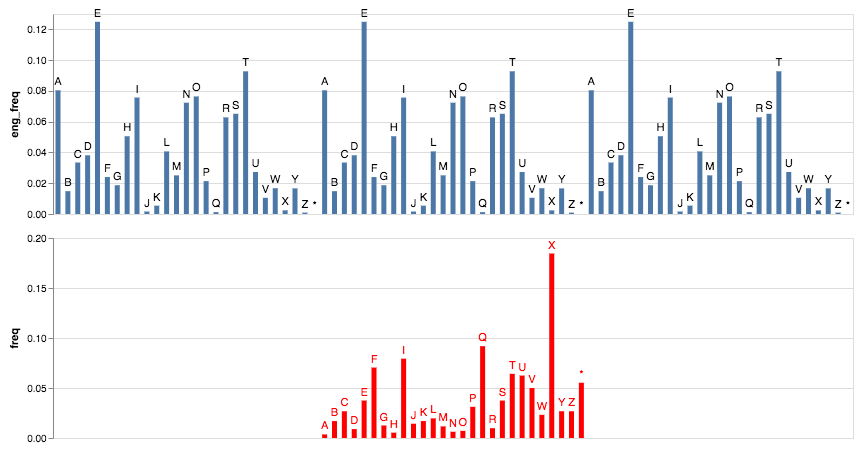

In [172]:
english_chart_text & cipher_chart_text

In [62]:
all_df = pd.merge(cipher_df, english_freq, how="outer", on='letter', ).fillna(0)

In [69]:
all_df = all_df.melt(id_vars="letter", var_name="type", value_name="freq")

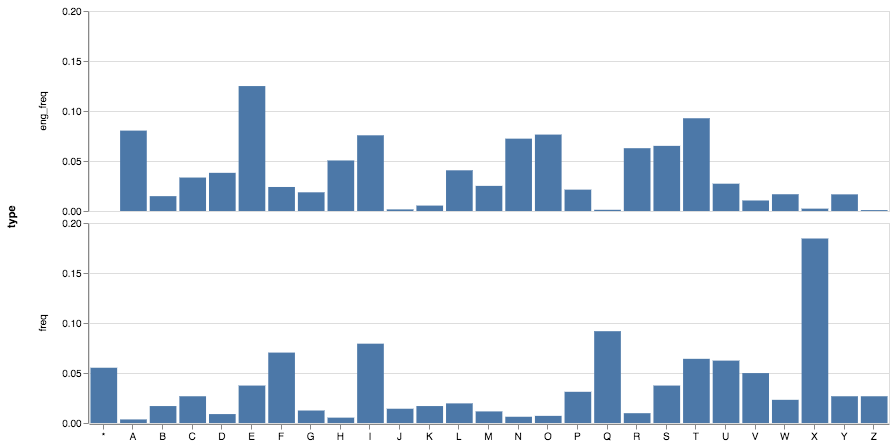

In [75]:
alt.Chart(all_df).mark_bar().encode(
    x=alt.X('letter:O', axis=alt.Axis(labelAngle=0, title=None)),
    y=alt.Y('freq:Q', title=None),
    row="type:O",
    tooltip="letter:O"
).properties(width=800, height=200)